# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,accuracy_score

In [3]:
df=pd.read_csv("heart.csv")   # for reading the dataset or csv file

FileNotFoundError: [Errno 2] No such file or directory: 'heart.csv'

# Perform o EDA part

In [ ]:
df.head()     # read top values 

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
df.tail()    # for read bottom values

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [ ]:
df.info()     # getting info about dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
df.describe()        # describe the  the dataset

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
df.columns       # information about column

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

In [ ]:
df.shape      # shape of data type in the shows no. of rows and columns

(303, 14)

In [ ]:
df.isnull().sum()   # for checkinng the null values in dataset

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [ ]:
df.corr()    # define the correlation between data type

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trtbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalachh,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exng,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


In [ ]:
df["age"].value_counts()   # for checking the value count

58    19
57    17
54    16
59    14
52    13
51    12
62    11
60    11
44    11
56    11
64    10
41    10
63     9
67     9
65     8
43     8
45     8
55     8
42     8
61     8
53     8
46     7
48     7
66     7
50     7
49     5
47     5
70     4
39     4
35     4
68     4
38     3
71     3
40     3
69     3
34     2
37     2
29     1
74     1
76     1
77     1
Name: age, dtype: int64

In [ ]:
df["cp"].value_counts()    # to count the chest pain value 

0    143
2     87
1     50
3     23
Name: cp, dtype: int64

In [ ]:
df.dtypes              # descibe the data type or display columns name

age           int64
sex           int64
cp            int64
trtbps        int64
chol          int64
fbs           int64
restecg       int64
thalachh      int64
exng          int64
oldpeak     float64
slp           int64
caa           int64
thall         int64
output        int64
dtype: object

In [ ]:
df=df.dropna()       # use to remove the row that contain null value
df.count()

age         303
sex         303
cp          303
trtbps      303
chol        303
fbs         303
restecg     303
thalachh    303
exng        303
oldpeak     303
slp         303
caa         303
thall       303
output      303
dtype: int64

In [ ]:
pd.crosstab(df.output,df.sex)      # it reduce the possible error.

sex,0,1
output,,
0,24,114
1,72,93


# Visualization

<AxesSubplot:xlabel='age'>

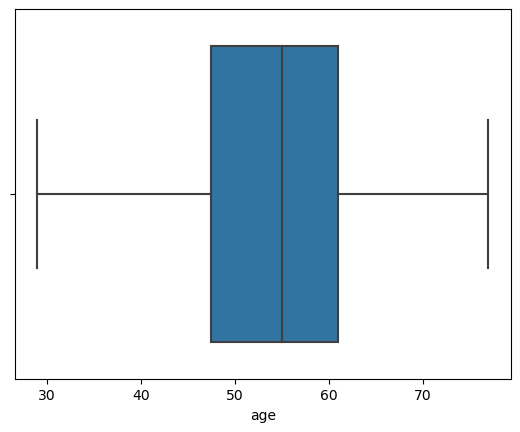

In [ ]:
sns.boxplot(x=df["age"])                   # boxplot is to measure of how well distributed the data in a dataset.

<AxesSubplot:xlabel='cp'>

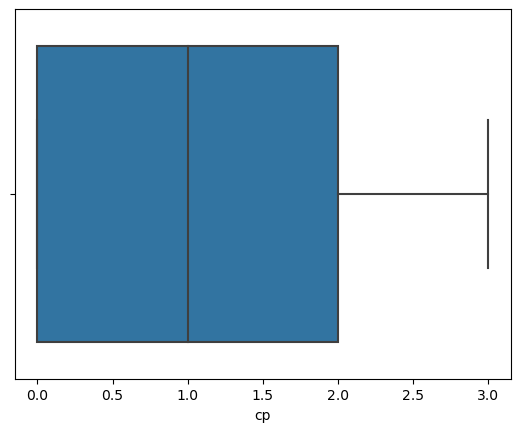

In [ ]:
sns.boxplot(x=df["cp"])

<AxesSubplot:>

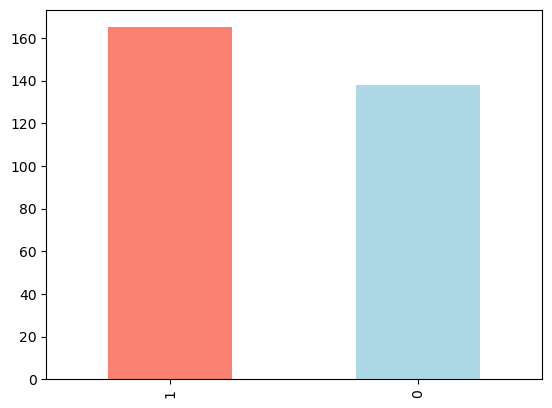

In [ ]:
df["output"].value_counts().plot(kind='bar',color=["salmon","lightblue"])

<AxesSubplot:>

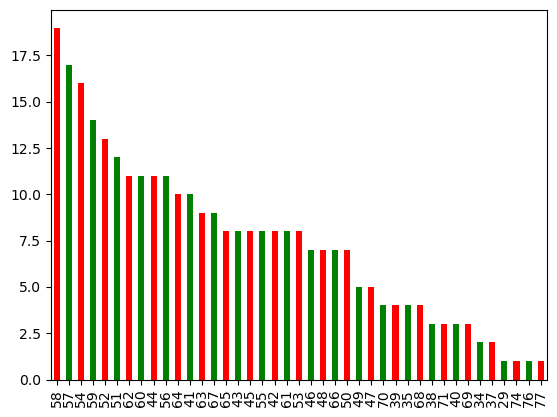

In [ ]:
df["age"].value_counts().plot(kind='bar',color=["red","green"])

<AxesSubplot:>

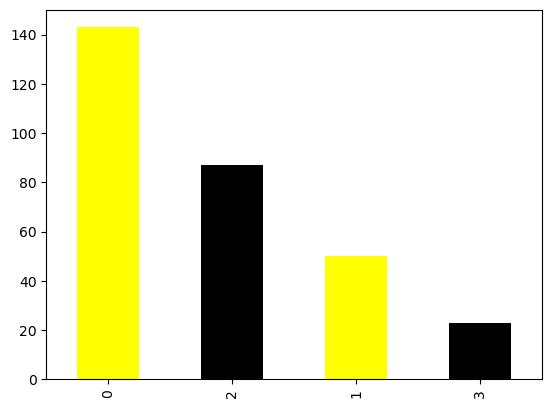

In [ ]:
df["cp"].value_counts().plot(kind='bar',color=["yellow","black"])

<AxesSubplot:>

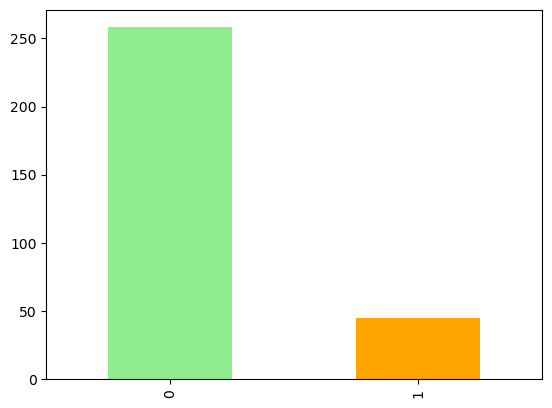

In [ ]:
df["fbs"].value_counts().plot(kind='bar',color=["lightgreen","orange"])

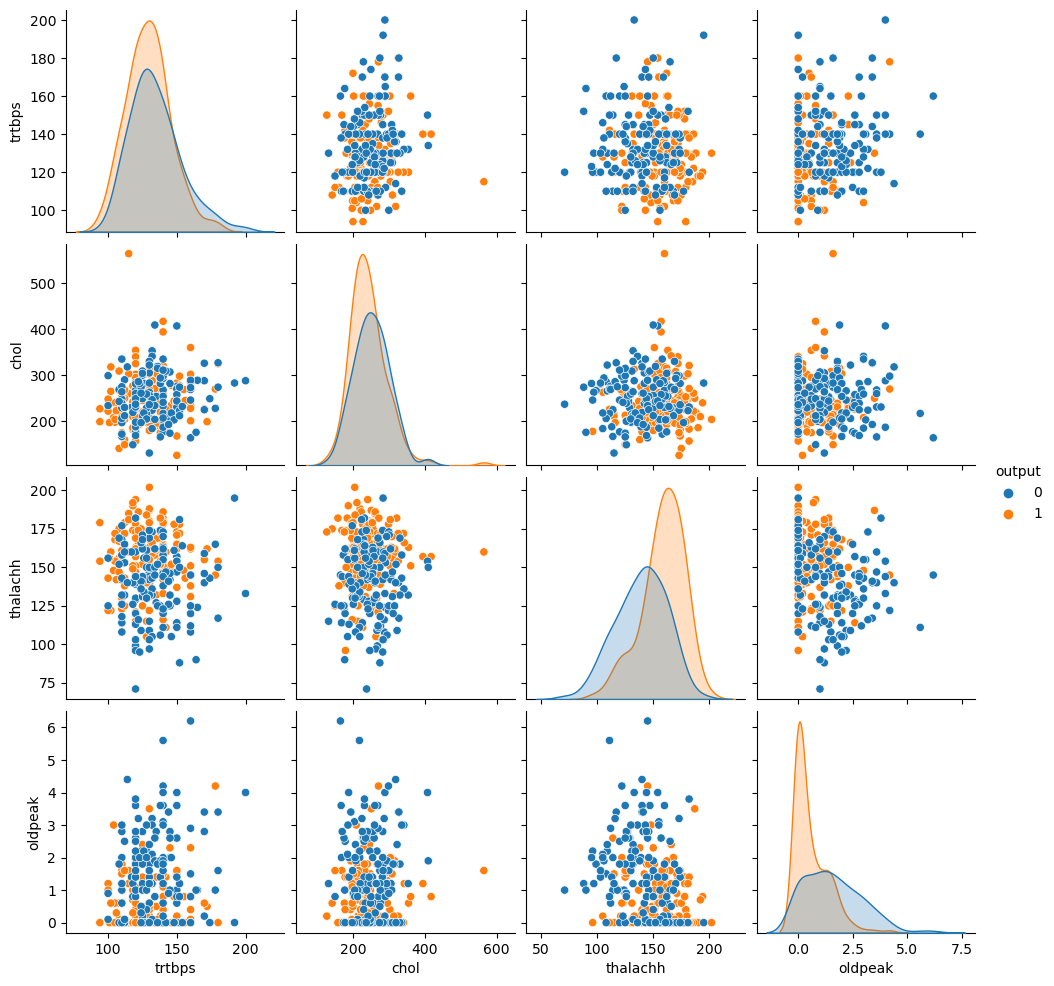

In [ ]:
sns.pairplot(df[['trtbps', 'chol', 'thalachh', 'oldpeak', 'output' ]], hue=('output'))
# use to plot pairwise relationships between variables within a datase

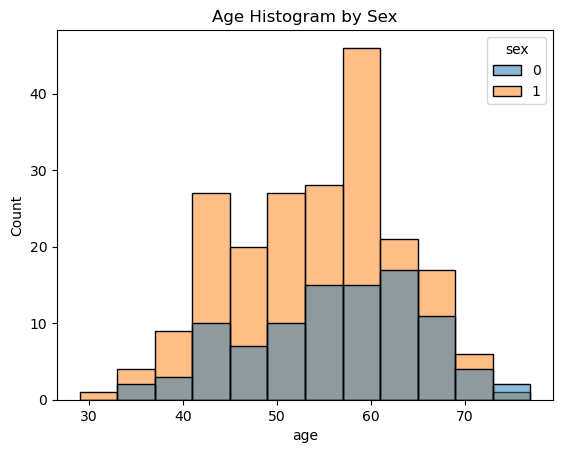

In [ ]:
plt.title('Age Histogram by Sex')
sns.histplot(df, x='age', hue='sex');

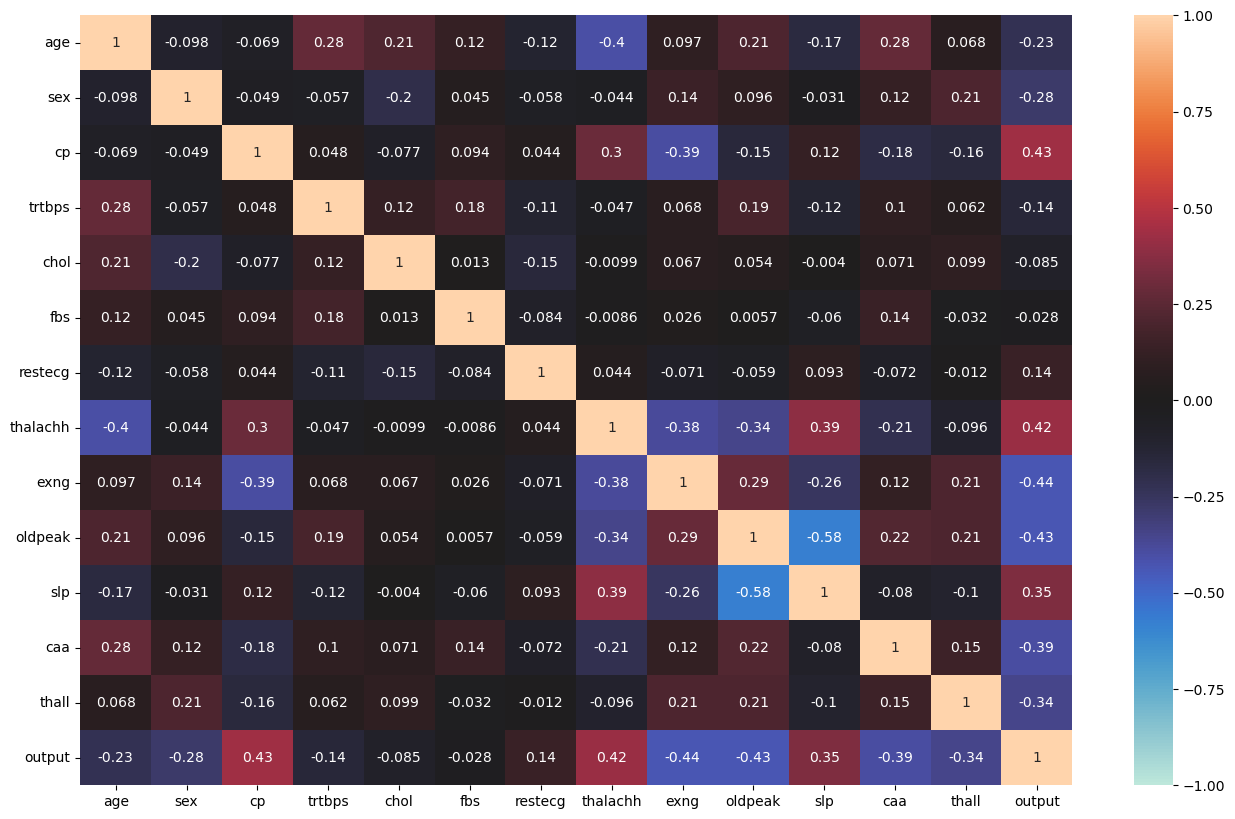

In [ ]:
heart_corr = df.corr()
plt.figure(figsize=(16, 10))
sns.heatmap(heart_corr, vmin=-1, center=0, vmax=1, annot=True);

<AxesSubplot:>

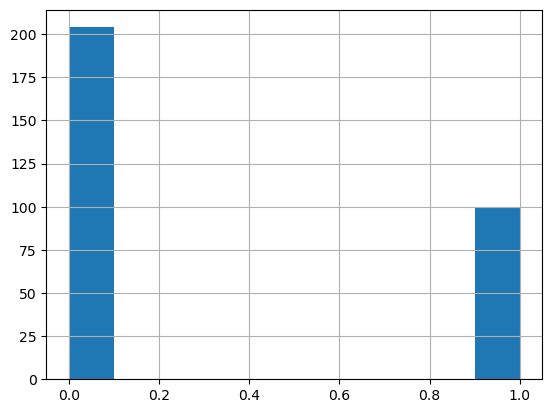

In [ ]:
df["exng"].hist()

<AxesSubplot:>

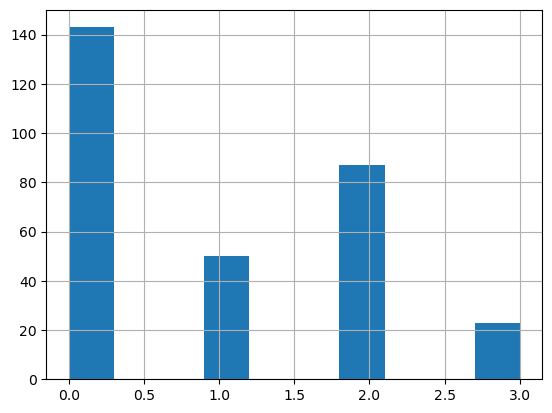

In [ ]:
df["cp"].hist()

<AxesSubplot:>

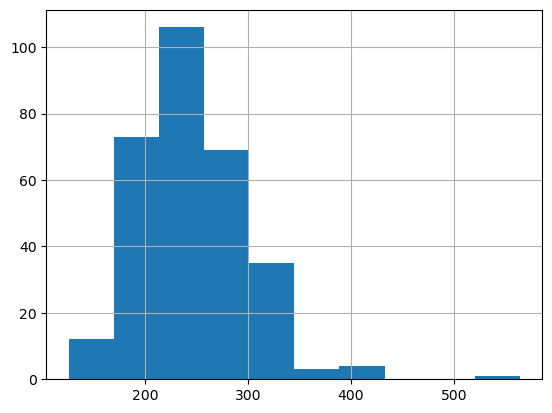

In [ ]:
df["chol"].hist()

(array([0, 1, 2, 3]),
 [Text(0, 0, '0'), Text(1, 0, '1'), Text(2, 0, '2'), Text(3, 0, '3')])

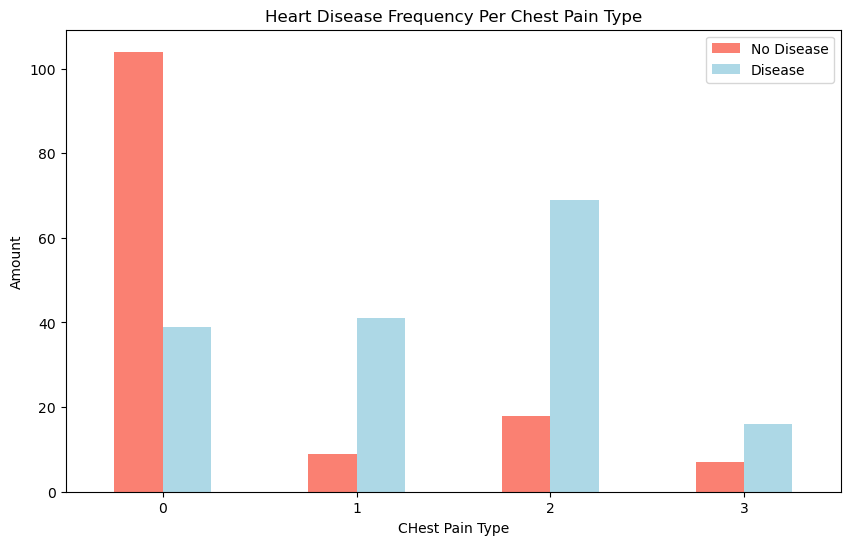

In [ ]:
pd.crosstab(df.cp,df.output).plot(kind="bar",figsize=(10,6),color=["salmon","lightblue"])
plt.title("Heart Disease Frequency Per Chest Pain Type")
plt.xlabel("CHest Pain Type")
plt.ylabel("Amount")
plt.legend(["No Disease","Disease"])
plt.xticks(rotation=0)

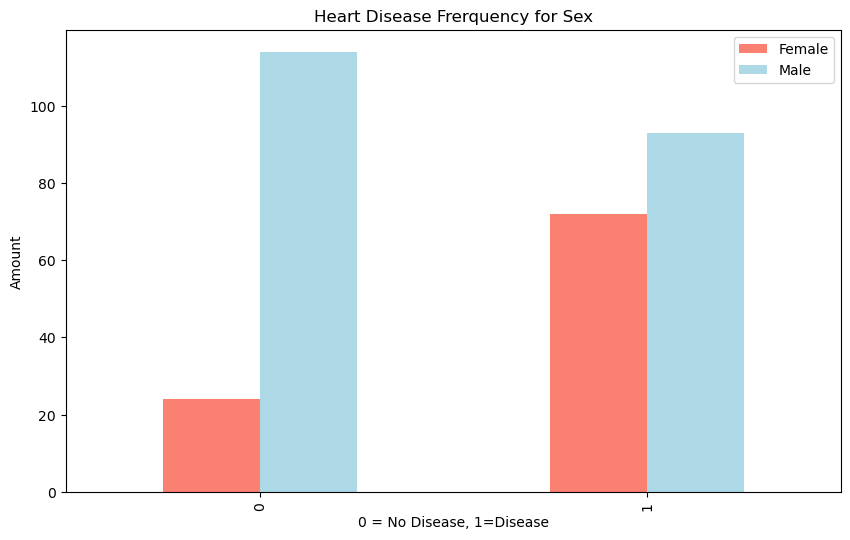

In [ ]:
pd.crosstab(df.output, df.sex).plot(kind="bar",figsize=(10,6),color=["salmon","lightblue"])
plt.title("Heart Disease Frerquency for Sex")
plt.xlabel("0 = No Disease, 1=Disease")
plt.ylabel("Amount")
plt.legend(["Female","Male"]);

#From the barchart below, the frequency of male getting heart disease is higher in this dataset compared to male.

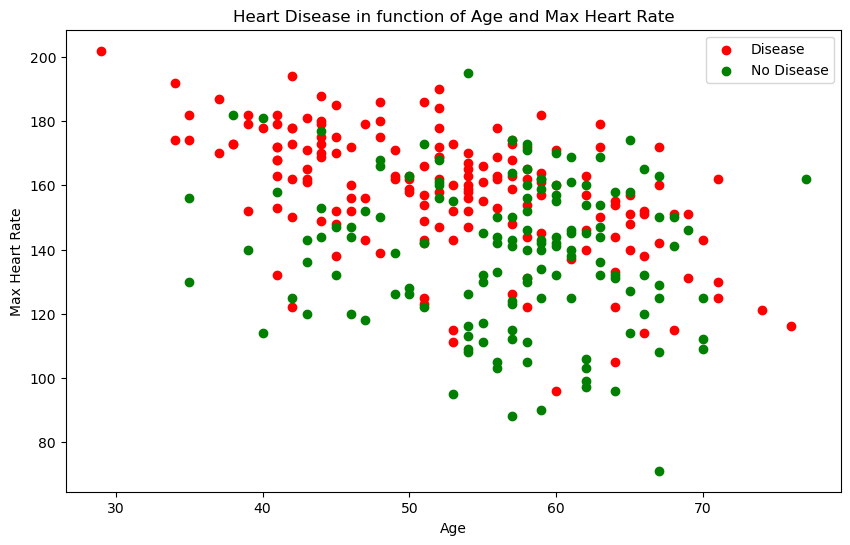

In [ ]:
plt.figure(figsize=(10,6))

#Scatter with positive examples
plt.scatter(df.age[df.output==1],
           df.thalachh[df.output==1],
           c="r")

#Scatter with negative examples
plt.scatter(df.age[df.output==0],
           df.thalachh[df.output==0],
           c="g");

plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease","No Disease"])
#The chances of getting maximum heart rate is higher for heart disease patients

# Model Selection

In [ ]:
x=df.drop(columns='output',axis=1)
y=df['output']
x

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [ ]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: output, Length: 303, dtype: int64

In [ ]:
#splitting the data to train and test data
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.20,stratify=y,random_state=2)
print(x.shape,xtrain.shape,xtest.shape)

(303, 13) (242, 13) (61, 13)


In [ ]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

#training logistic regression model with training data
model.fit(xtrain,ytrain)


E:\Anu\Newfolder\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
model_pred=model.predict(xtest)
model_pred

array([0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1], dtype=int64)

In [ ]:
#accuracy on training data
xtrain_prediction=model.predict(xtrain)
training_data_accuracy=accuracy_score(xtrain_prediction,ytrain)
print(training_data_accuracy)

0.8512396694214877


In [ ]:
#accuracy on test data
xtest_prediction=model.predict(xtest)
test_accuracy=accuracy_score(xtest_prediction,ytest)
print(test_accuracy)

0.819672131147541


In [ ]:

m1 = 'Logistic Regression'
lr = LogisticRegression()
model = lr.fit(xtrain, ytrain)
lr_predict = lr.predict(xtest)
lr_conf_matrix = confusion_matrix(ytest, lr_predict)
lr_acc_score = accuracy_score(ytest, lr_predict)
print("confussion matrix")
print(lr_conf_matrix)
print("\n")


confussion matrix
[[23  5]
 [ 6 27]]




E:\Anu\Newfolder\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


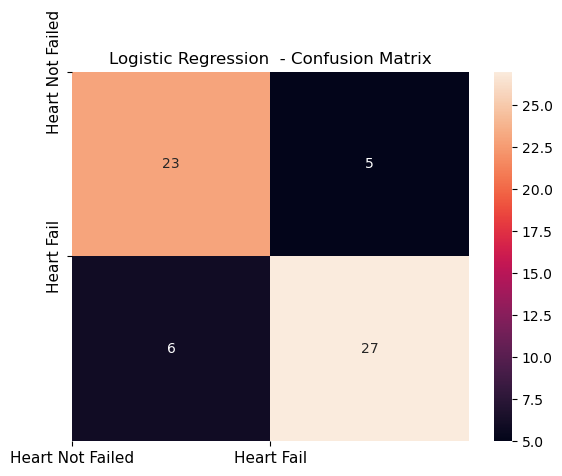

In [ ]:
from sklearn.metrics import confusion_matrix
matrix= confusion_matrix(ytest, xtest_prediction)
sns.heatmap(matrix,annot = True, fmt = "d")
plt.title("Logistic Regression  - Confusion Matrix")
plt.xticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=11)
plt.yticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=11)
plt.show()

In [ ]:
#Naive Bayes
from sklearn.naive_bayes import GaussianNB
model2= GaussianNB()
model2.fit(xtrain,ytrain)


GaussianNB()

In [ ]:
prediction=model2.predict(xtest)
score=accuracy_score(prediction,ytest)
score

0.819672131147541

In [ ]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
model3=RandomForestClassifier()
model3.fit(xtrain,ytrain)

RandomForestClassifier()

In [ ]:
prediction_RF=model3.predict(xtest)
score=accuracy_score(prediction_RF,ytest)
score

0.8032786885245902

In [ ]:
#buliding predictive system
input_data = (62,0,0,140,268,0,0,160,0,3.6,0,2,2)
# change the input data to a numpy array
input_data_as_numpy_array= np.asarray(input_data)
# reshape the numpy array as we are predicting for only on instance

input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]== 0):
  print('The Person does not have a Heart Disease')
else:
  print('The Person has Heart Disease')

[0]
The Person does not have a Heart Disease


E:\Anu\Newfolder\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [ ]:
input_data = (63,1,3,145,233,1,0,150,0,2.3,0,0,1)
input_data_as_numpy_array= np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]== 0):
  print('The Person does not have a Heart Disease')
else:
  print('The Person has Heart Disease')

[1]
The Person has Heart Disease


E:\Anu\Newfolder\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


# Report Of Dataset

In [ ]:
from pandas_profiling import ProfileReport

C:\Users\hp\AppData\Local\Temp\ipykernel_5640\2274191625.py:1: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


In [ ]:
rp =ProfileReport(df)
rp

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]